# Machine Learning Prediction For Human Activity Recognition Using SmartPhones

In [126]:
# Import packages from libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the dataset and saving to CSV

In [127]:
# === Load feature names and activity labels ===

features = pd.read_csv('features.txt', delim_whitespace=True, header=None)
feature_names = features[1].values

activity_labels = pd.read_csv('activity_labels.txt', delim_whitespace=True, header=None, index_col=0)
activity_labels_dict = activity_labels[1].to_dict()

/var/folders/vt/gsz9r5ls2bbdhx12jrgnq06r0000gn/T/ipykernel_2524/4212292778.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('features.txt', delim_whitespace=True, header=None)
/var/folders/vt/gsz9r5ls2bbdhx12jrgnq06r0000gn/T/ipykernel_2524/4212292778.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  activity_labels = pd.read_csv('activity_labels.txt', delim_whitespace=True, header=None, index_col=0)


In [128]:
# === Load train data ===

X_train = pd.read_csv('train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('train/y_train.txt', header=None)
subject_train = pd.read_csv('train/subject_train.txt', header=None)

/var/folders/vt/gsz9r5ls2bbdhx12jrgnq06r0000gn/T/ipykernel_2524/796847253.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('train/X_train.txt', delim_whitespace=True, header=None)


In [129]:
# === Load test data ===

X_test = pd.read_csv('test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('test/y_test.txt', header=None)
subject_test = pd.read_csv('test/subject_test.txt', header=None)

/var/folders/vt/gsz9r5ls2bbdhx12jrgnq06r0000gn/T/ipykernel_2524/4038212866.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('test/X_test.txt', delim_whitespace=True, header=None)


In [130]:
# === Concatenate train and test data ===

X = pd.concat([X_train, X_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)
subjects = pd.concat([subject_train, subject_test], ignore_index=True)

In [131]:
# === Assign column names ===

X.columns = feature_names
harData = pd.concat([subjects, y, X], axis=1)
harData.columns = ['subject', 'activity'] + list(feature_names)

In [132]:
# === Replace activity numbers with labels ===

harData['activity'] = harData['activity'].map(activity_labels_dict)

In [133]:
# === Save to CSV ===

harData.to_csv('HAR_cleaned_dataset.csv', index=False)

In [134]:
harData.head()

,subject,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,1,STANDING,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,STANDING,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,STANDING,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,STANDING,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,STANDING,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


# Preprocessing

In [135]:
harData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, subject to angle(Z,gravityMean)
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [136]:
harData['activity'].value_counts()

activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

/var/folders/vt/gsz9r5ls2bbdhx12jrgnq06r0000gn/T/ipykernel_2524/1519574892.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_counts.index, y=activity_counts.values, palette='tab10')


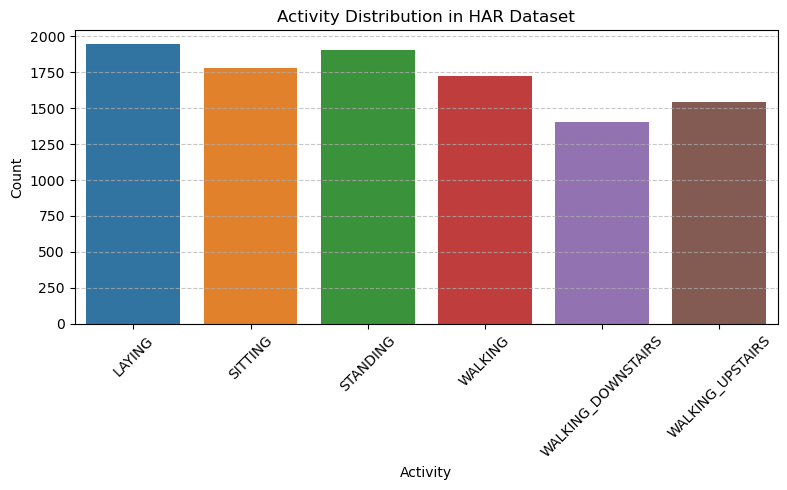

In [137]:
# Count of each activity
activity_counts = harData['activity'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette='tab10')

plt.title('Activity Distribution in HAR Dataset')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [138]:
# Checking for Duplicate and Missing Values

print("Any missing values?\n", harData.isnull().sum().sum())
print("Duplicates found:", harData.duplicated().sum())

Any missing values?
 0
Duplicates found: 0


In [139]:
# Label encoding for Target Variable

le = LabelEncoder()
harData['activity_encoded'] = le.fit_transform(harData['activity'])

In [140]:
# label mapping for target Variable

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping for Activity Variable:", label_mapping)

Label mapping for Activity Variable: {'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


In [141]:
# keep only encoded target

harData = harData.drop(columns=['activity']) 

In [142]:
# Count features with zero variance

zero_var = harData.drop(columns=['activity_encoded']).nunique() == 1
print("Zero variance features:", zero_var.sum())

Zero variance features: 0


# Feature Engineering and Feature Selection

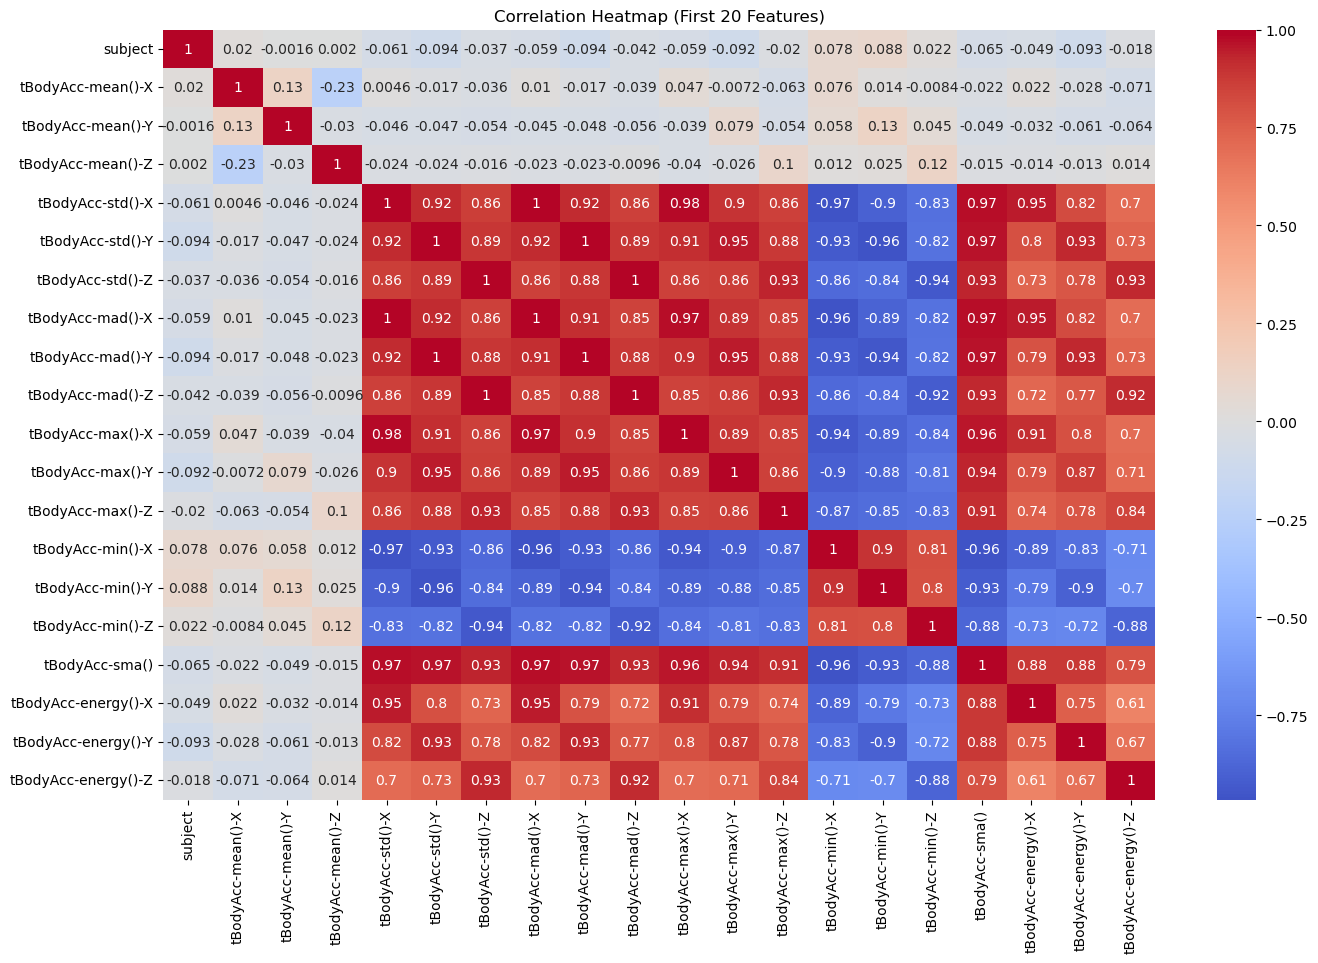

In [143]:
# Correlation Heatmap

sample_features = harData.columns[:20]
plt.figure(figsize=(16, 10))
sns.heatmap(harData[sample_features].corr(), cmap='coolwarm', center=0, annot=True)
plt.title("Correlation Heatmap (First 20 Features)")
plt.show()

In [144]:
# Dropping subject column and seperating the encoded target variable

X = harData.drop(columns=['subject'])
y = X['activity_encoded']
X = X.drop(columns=['activity_encoded'])

In [145]:
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [146]:
y

0        2
1        2
2        2
3        2
4        2
        ..
10294    5
10295    5
10296    5
10297    5
10298    5
Name: activity_encoded, Length: 10299, dtype: int64

In [147]:
#Identify highly correlated(85%) features to drop them and reduce multicollinearity and overfitting

corr_matrix = X.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.85
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

In [148]:
print(f"Number of features to drop because of high correlation: (> {threshold}):", len(to_drop))

Number of features to drop because of high correlation: (> 0.85): 409


In [149]:
print("Example features to drop:", to_drop[:10])

Example features to drop: ['tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y']


In [150]:
# Dropping highly correlated features to reduce multicollinearity and overfitting

X_reduced = X.drop(columns=to_drop)
X_reduced['activity_encoded'] = y.values

In [151]:
#Splitting up Target Variable

X = X_reduced.drop(columns=['activity_encoded'])
y = X_reduced['activity_encoded']

# Principal Component Analysis

In [152]:
# Keep enough components to retain 95% of variance

principal_component_analysis = PCA(n_components=0.95)
X_principal_component_analysis = principal_component_analysis.fit_transform(X)

In [153]:
print("Original feature shape:", X.shape)
print("shape after applying principle component analysis:", X_principal_component_analysis.shape)
print(f"Explainable variance ratio : {principal_component_analysis.explained_variance_ratio_.sum():.4f}")

Original feature shape: (10299, 152)
shape after applying principle component analysis: (10299, 83)
Explainable variance ratio : 0.9507


In [154]:
# Applying Principal Component Analysis for reducing features from 197 to 2

principal_component_analysis_df = pd.DataFrame(X_principal_component_analysis[:, :2], columns=['PC1', 'PC2'])
principal_component_analysis_df['activity'] = y

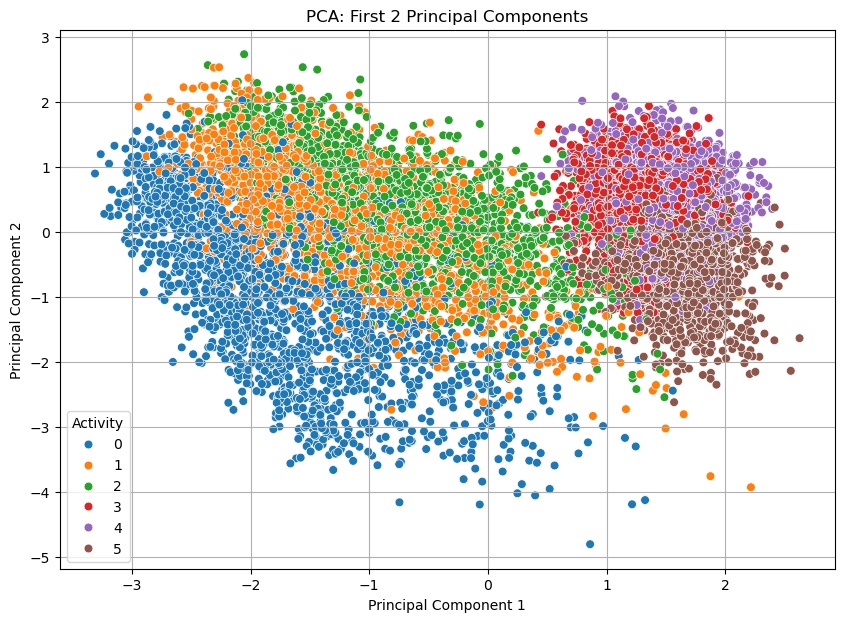

In [155]:
# Visualise the dataset after applying Dimensional Reduction

plt.figure(figsize=(10, 7))
sns.scatterplot(data=principal_component_analysis_df, x='PC1', y='PC2', hue='activity', palette='tab10', s=40)
plt.title('PCA: First 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity')
plt.grid(True)
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

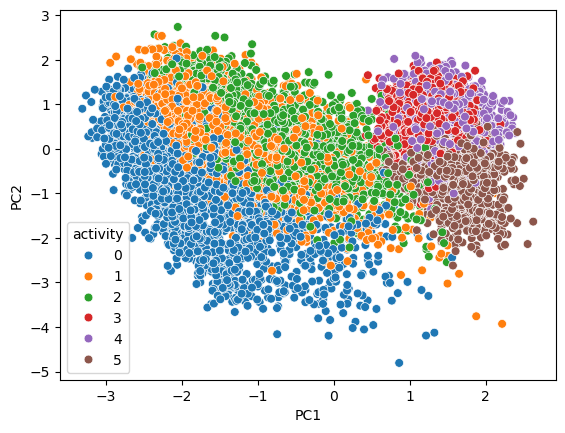

In [156]:
# PCA Scatter plot with activities ordered by label
sns.scatterplot(data=principal_component_analysis_df, 
                x='PC1', 
                y='PC2', 
                hue='activity', 
                hue_order=sorted(principal_component_analysis_df['activity'].unique()),
                palette='tab10', 
                s=40)


In [157]:
# Splitting the target variable with non target variables

y = principal_component_analysis_df['activity']
X = principal_component_analysis_df.drop(columns=['activity'])

In [158]:
X

,PC1,PC2
0,-1.312670,0.301464
1,-1.395157,0.332499
2,-1.359736,0.889308
3,-1.853691,0.952181
4,-1.750851,1.208740
...,...,...
10294,1.826251,-0.618677
10295,1.626284,-0.534817
10296,1.539407,-0.505044
10297,1.488109,-0.489960


In [159]:
y

0        2
1        2
2        2
3        2
4        2
        ..
10294    5
10295    5
10296    5
10297    5
10298    5
Name: activity, Length: 10299, dtype: int64

# Dividing the Data into Training and Testing Set

In [160]:
features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Random Forest Classifier Model

In [161]:
# Using Random Forest Classifier Model

rfcModel = RandomForestClassifier(n_estimators=50,random_state=42)
rfcModel.fit(features_train, labels_train)

labels_pred_rfcModel = rfcModel.predict(features_test)


In [162]:
accuracyRFC = accuracy_score(labels_test, labels_pred_rfcModel)
print("RandomForestModel has the accuracy of : \n", accuracyRFC)

RandomForestModel has the accuracy of : 
 0.6080906148867314


In [163]:
print("Classification Report of RandomForestModel is:\n",classification_report(labels_test, labels_pred_rfcModel))

Classification Report of RandomForestModel is:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       583
           1       0.48      0.43      0.46       533
           2       0.58      0.61      0.60       572
           3       0.54      0.58      0.56       517
           4       0.48      0.40      0.44       422
           5       0.67      0.72      0.69       463

    accuracy                           0.61      3090
   macro avg       0.60      0.60      0.60      3090
weighted avg       0.60      0.61      0.60      3090



In [164]:
print("Confusion Matrix of RandomForestModel :\n", confusion_matrix(labels_test, labels_pred_rfcModel))

Confusion Matrix of RandomForestModel :
 [[494  66  23   0   0   0]
 [ 84 231 213   1   1   3]
 [ 22 178 351  13   2   6]
 [  0   2   9 301 122  83]
 [  0   1   3 174 170  74]
 [  1   0   2  70  58 332]]


# Support Vector Machine

In [165]:
# Implementing Support Vector Classifier Model
svmModel = SVC(kernel='rbf', C=1.0, gamma='scale',random_state=42)

svmModel.fit(features_train, labels_train)

labels_pred_svmModel = svmModel.predict(features_test)

In [166]:
accuracySVM = accuracy_score(labels_test, labels_pred_svmModel)
print("SupportVectorMachine has an accuracy:", accuracySVM)

SupportVectorMachine has an accuracy: 0.6372168284789644


In [167]:
print("Classification Report of SupportVectorMachine is:\n", classification_report(labels_test, labels_pred_svmModel))

Classification Report of SupportVectorMachine is:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       583
           1       0.52      0.42      0.46       533
           2       0.60      0.72      0.65       572
           3       0.55      0.74      0.63       517
           4       0.56      0.26      0.36       422
           5       0.69      0.79      0.74       463

    accuracy                           0.64      3090
   macro avg       0.63      0.62      0.61      3090
weighted avg       0.63      0.64      0.62      3090



In [168]:
print("Confusion Matrix of SupportVectorMachine :\n", confusion_matrix(labels_test, labels_pred_svmModel))

Confusion Matrix of SupportVectorMachine :
 [[479  79  25   0   0   0]
 [ 61 222 244   1   0   5]
 [ 11 128 410  13   0  10]
 [  0   0   6 380  56  75]
 [  0   0   0 233 110  79]
 [  0   1   3  60  31 368]]


# K Nearest Neighbours

In [169]:
# Scale features

scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

K_NearestNeighborModel = KNeighborsClassifier(n_neighbors=15)
K_NearestNeighborModel.fit(features_train_scaled, labels_train)

labels_pred_knnModel = K_NearestNeighborModel.predict(features_test_scaled)

In [170]:
accuracyKNN = accuracy_score(labels_test, labels_pred_knnModel)
print("K-NearestNeighbour Model has an accuracy of:", accuracyKNN)

K-NearestNeighbour Model has an accuracy of: 0.6300970873786408


In [171]:
print("Classification Report of K-NearestNeighbour Model:\n", classification_report(labels_test, labels_pred_knnModel))

Classification Report of K-NearestNeighbour Model:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       583
           1       0.50      0.44      0.47       533
           2       0.59      0.64      0.61       572
           3       0.56      0.67      0.61       517
           4       0.53      0.37      0.44       422
           5       0.69      0.75      0.72       463

    accuracy                           0.63      3090
   macro avg       0.62      0.62      0.62      3090
weighted avg       0.63      0.63      0.62      3090



In [172]:
print("Confusion Matrix of K-NearestNeighbour Model :\n", confusion_matrix(labels_test, labels_pred_knnModel))

Confusion Matrix of K-NearestNeighbour Model :
 [[494  71  18   0   0   0]
 [ 67 237 222   2   0   5]
 [ 17 167 365  13   0  10]
 [  0   0   6 348  89  74]
 [  0   0   0 200 158  64]
 [  0   0   5  64  49 345]]


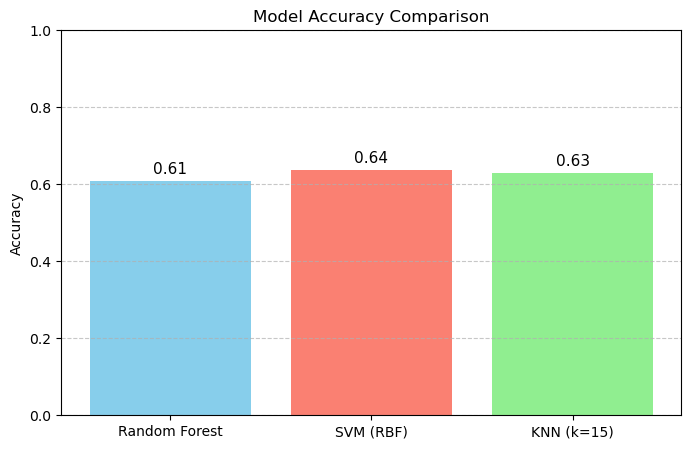

In [173]:
# Model names and their corresponding accuracy scores
model_names = ['Random Forest', 'SVM (RBF)', 'KNN (k=15)']
accuracy_scores = [accuracyRFC, accuracySVM, accuracyKNN]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracy_scores, color=['skyblue', 'salmon', 'lightgreen'])

# Annotate accuracy on top of bars
for bar, acc in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f'{acc:.2f}', ha='center', va='bottom', fontsize=11)

plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Running the same dataset on Random Forest Classifier Without applying PCA

In [ ]:
X_uncorr = harData.drop(columns=['activity_encoded'])
y_uncorr = harData['activity_encoded']

features_train2, features_test2, labels_train2, labels_test2= train_test_split(X_uncorr, y_uncorr, test_size=0.4, stratify=y_uncorr, random_state=42)

rfcWithoutPCA = RandomForestClassifier(random_state=40)
rfcWithoutPCA.fit(features_train2, labels_train2)
labels_pred2 = rfcWithoutPCA.predict(features_test2)

In [ ]:
print("accuracy for Random Forest Classifier without applying PCA:\n", accuracy_score(labels_test2, labels_pred2))

In [ ]:
print("Confusion Matrix of RandomForestModel without PCA :\n",classification_report(labels_test2, labels_pred2))